# Projekt MSP1
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 200 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využití službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázána!

S případnými dotazy se obracejte na Vojtěcha Mrázka (mrazek@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do neděle 22. 10. 2023 v IS VUT. Kontrola bude probíhat na Pythonu 3.10.12; neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

_Peter Ďurica xduric05_

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi. Není dovoleno načítat jiné knihovny.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Z logu vás budou nejvíce zajímat řádky
```
Configuration: config6
Run: 191
Time of run: 53.298725254089774
```

Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou je to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

In [2]:
# TODO nacteni dat ze zip souboru

def load_logfile(f) -> dict:
    """Load a logfile from a file-like object and return a dict with the data."""
    data = {
        "conf": None,
        "run": None,
        "time": np.nan,
    }

    for line in f:
        line = line.decode("utf-8").split()
        if line[0] == "Configuration:":
            data["conf"] = line[1]
        elif line[0] == "Run:":
            data["run"] = line[1]
        elif line[0] == "Time":
            data["time"] = np.float64(line[3])
    return data

data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        with zf.open(filename, "r") as f:
            data.append(load_logfile(f))
df = pd.DataFrame(data)
df

,conf,run,time
0,config1,0,104.967142
1,config1,1,98.617357
2,config1,2,106.476885
3,config1,3,115.230299
4,config1,4,97.658466
...,...,...,...
1195,config6,195,168.809495
1196,config6,196,159.607244
1197,config6,197,171.049799
1198,config6,198,164.478283


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. 

Text(0.5, 1.0, 'Time per configuration')

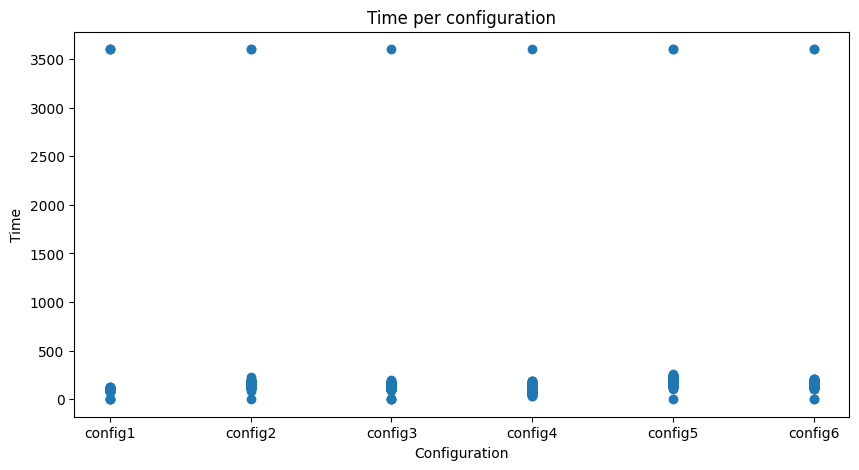

In [3]:
# TODO vykresleni grafu pro identifikace outlieru
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df["conf"], df["time"])
ax.set_xlabel("Configuration")
ax.set_ylabel("Time")
ax.set_title("Time per configuration")

__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů?_

Objavili sa tam chybné hodnoty (takzv. outliers), ktorých hodnoty sú výrazne odlišné od priemerných výsledkov algoritmov. Hodnoty outlierov sú buď priveľmi vysoké (3500+), kedy je algoritmus ukončený na vypršanie časového limitu, alebo sú príliš nízke (okolo 0), kedy bol algoritmus ukončený segfaultom. 

Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

Text(0.5, 1.0, 'Time per configuration (Filtered)')

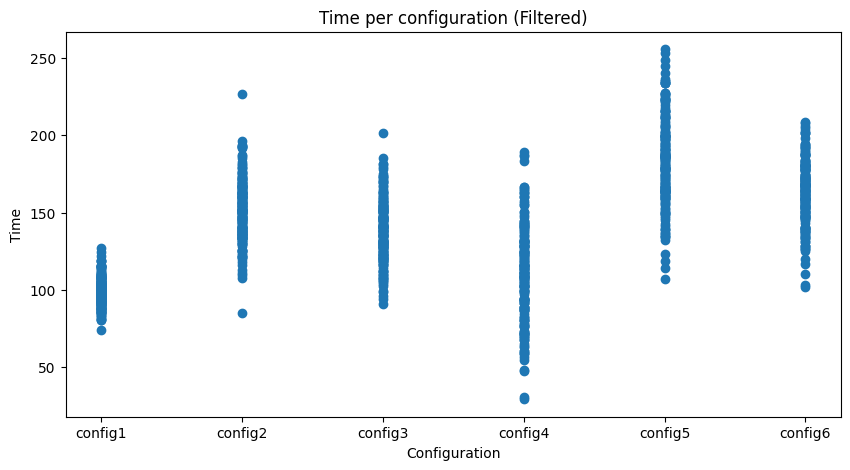

In [4]:
# TODO kod pro upravu dataframe tak, že tam tyto hodnoty nebudou:
df_notFiltered = df.copy()
df = df[(df["time"] < 500) & (df["time"] > 5)]
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df["conf"], df["time"])
ax.set_xlabel("Configuration")
ax.set_ylabel("Time")
ax.set_title("Time per configuration (Filtered)")

## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry času pro jednotlivé konfigurace.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [5]:
# TODO deskriptivni parametry
Des_parameters = df.groupby("conf").describe()
Des_parameters

time                                                             \
         count        mean        std         min         25%         50%   
conf                                                                        
config1  193.0   99.590413   9.386788   73.802549   92.979469   99.865028   
config2  197.0  151.732975  19.833198   85.174653  137.995662  151.516091   
config3  195.0  138.616959  19.867428   90.567110  124.803901  138.678404   
config4  199.0  110.317016  30.656816   29.093401   88.742158  110.782732   
config5  197.0  183.659767  28.729836  107.283620  164.070091  183.843132   
config6  196.0  162.829359  20.648193  102.074892  149.917475  163.990098   

                                 
                75%         max  
conf                             
config1  104.824724  127.201692  
config2  163.802880  227.054630  
config3  151.536291  201.577616  
config4  130.665606  188.971462  
config5  201.250693  255.807973  
config6  177.730865  208.795048

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

Z parametrov vieme vyčítať počet platných hodnôt pre každú konfiguráciu (count). Následne vidíme aritmetický priemer hodnôt konfigurácií (mean) a rovnako aj štandartnú odchylku (std). Potom sú tam minimálne a maximálne namerané hodnoty z konfigurácií (min, max) a hodnoty podľa percentuálnej polohy v poli hodnôt(25%, 50%, 75%), čiže 50% je medián a 25% a 75% sú spodné a horné kvartily.

## Vizualizace
Vizualizujte časy běhů algoritmů v jednom kompaktním grafu tak, aby byl zřejmý i rozptyl hodnot. Zvolte vhodný graf, který pak níže komentujte.

<Axes: title={'center': 'time'}, xlabel='conf', ylabel='Time'>

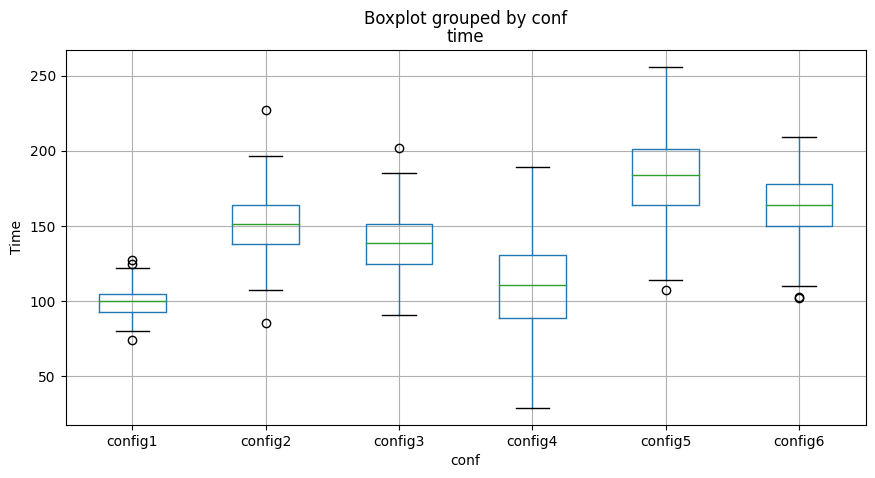

In [6]:
# TODO graf
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylabel("Time")
df.boxplot(column="time", by="conf", ax=ax)

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

Pre každú konfiguráciu som vizualizoval jej boxplot. Vrchné a spodné hranice zobrazujú maximálne a minimálne hodnoty v distribúcii. Modrý štvoruholník zobrazuje rozptyl medzi spodným a vrchným kvartilom a zelená čiara vnútry štvoruholníka zobrazuje medián. Prázdne krúžky sú hodnoty, pri ktorých sa algoritmus vykreslovacej funkcie rozhodnol, že nepatria do distribúcie ale kedže sú to platné hodnoty v meraní tak si nemyslím, že by som ich mal vyradiť z dataframu. Pri pohlade na graf sa javia najlepšie konfigurácie 1 a 4.

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. Můžete i přidat další buňky.

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet studentova rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně).

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

Budem skúmať dáta z konfigurácií 1 a 4. Rozdelenie oboch konfigurácií je normálne a ich variancia je výrazne rozdielna (cca. 90 vs 900). Počet hodnôt v každej z konfigurácií nieje rovnaký. Preto použijem Welchov t-test, ktorý je vhodný pre porovnanie týchto typov konfigurácií. Nulová hypotéza pri tomto teste je, že sa stredné hodnoty oboch konfigurácií rovnajú. V následnom teste sa budeme snažiť vyvrátiť alebo potvrdiť túto hypotézu. Vybrané konfigurácie sa líšia hlavne vo variabilite hodnôt, kedy niektoré behy vo 4. konfigurácii naberajú nižšie hodnoty ako v 1. konfigurácii ale zároveň hodnoty v 1. konfigurácii sú omnoho menej variabilné a nemajú takú vysokú odchylku ako vo 4. konfigurácii.

H0: sigma1 == sigma2

H1: sigma1 > sigma2 (Konfigurácia 4 je viac efektívnejšia)

H2: sigma1 < sigma2 (Konfigurácia 1 je viac efektívnejšia)

In [7]:
# TODO: Implementace s vyuzitim knihovni funkce
t, p = stats.ttest_ind(df[df["conf"] == "config1"]["time"], df[df["conf"] == "config4"]["time"], equal_var=False)
t, p

(-4.713292868840319, 4.168682113989347e-06)

__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

Po vykonaní testu sme zistili že rozdiel medzi strednými hodnotami konfiguráci je menší ako nula a tým pádom by mala byť 1. konfigurácia efektívnejšia. Avšak na vyvrátenie nulovej hypotézy je potrebné ešte zistiť pravdepodobnosť, že výsledná hodnota z testu nieje pravdivá. Táto pravdepodobnosť sa nachádza v hodnote premennej p a jej hodnota je približne 4e-6. Ak chceme mať istotu 95 % že výsledok testu je pravdivý musí byť táto hodnota menšia ako 0.05. Tým pádom možme vyradiť nulovú hypotézu a teda platí 2. hypotéza podľa ktorej je 1. konfigurácia efektívnejšia ako 4. konfigurácia.

In [8]:
# TODO vlastni implementace zvoleneho testu
def My_TTest(A, B):
    A_len = len(A)
    B_len = len(B)
    
    A_mean = np.mean(A) #sum(A) / A_len
    B_mean = np.mean(B) #sum(B) / B_len

    A_std = np.std(A, ddof=1) #sqrt(sum((A - A_mean) ** 2) / (A_len - 1))
    B_std = np.std(B, ddof=1) #sqrt(sum((B - B_mean) ** 2) / (B_len - 1))

    dof = (A_std ** 2 / A_len + B_std ** 2 / B_len) ** 2 / ((A_std ** 4 / (A_len ** 2 * (A_len - 1))) + (B_std ** 4 / (B_len ** 2 * (B_len - 1)))) #degrees of freedom

    t = (A_mean - B_mean) / np.sqrt(A_std ** 2 / A_len + B_std ** 2 / B_len)
    p = 2 * (1 - stats.t.cdf(np.abs(t),dof)) #cdf funkcia sa pozera do tabulky distribucie a vracia pravdepodobnost, ktoru potom musime prenasobit 2, lebo je to dvojstranny test

    return t, p

A = df[df["conf"] == "config1"]["time"]
B = df[df["conf"] == "config4"]["time"]

t, p = My_TTest(A, B)
t, p

(-4.713292868840319, 4.168682113947497e-06)